In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

# graficos incrustados
%matplotlib inline

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
ONG_data = pd.read_csv('LEARNING.csv', header=0)

/home/villacorta/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
ONG_data.ix[:100, :10]

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE
0,8901,GRI,0,IL,61081,,,3712,0,
1,9401,NWN,0,LA,70611,,,0,0,
2,9401,MSD,1,TN,37127-,,,3211,0,
3,8901,ENQ,0,MN,56475,,,2603,0,
4,9201,HCC,1,LA,70791,,,0,0,X
5,9301,USB,1,UT,84720,,,2709,0,
6,9401,FRC,1,CA,90056,,,0,0,
7,8801,PCH,2,IL,62376,,,5201,0,
8,8601,AMB,28,FL,32810,B,,3601,0,
9,9501,L15,1,NC,27850,,,0,0,


In [3]:
ONG_data.shape

(47720, 481)

In [4]:
print(ONG_data['ODATEDW'].count())
print(ONG_data['OSOURCE'].count())
print(ONG_data['TCODE'].count())
print(ONG_data['STATE'].count())

47720
47720
47720
47720


In [5]:
ONG_data.isnull().any()

ODATEDW         False
OSOURCE         False
TCODE           False
STATE           False
ZIP             False
MAILCODE        False
PVASTATE        False
DOB             False
NOEXCH          False
RECINHSE        False
RECP3           False
RECPGVG         False
RECSWEEP        False
MDMAUD          False
DOMAIN          False
CLUSTER          True
AGE              True
AGEFLAG         False
HOMEOWNR        False
CHILD03         False
CHILD07         False
CHILD12         False
CHILD18         False
NUMCHLD          True
INCOME           True
GENDER          False
WEALTH1          True
HIT             False
MBCRAFT          True
MBGARDEN         True
                ...  
RAMNT_20         True
RAMNT_21         True
RAMNT_22         True
RAMNT_23         True
RAMNT_24         True
RAMNTALL        False
NGIFTALL        False
CARDGIFT        False
MINRAMNT        False
MINRDATE        False
MAXRAMNT        False
MAXRDATE        False
LASTGIFT        False
LASTDATE        False
FISTDATE  

In [6]:
tipos = ONG_data.columns.to_series().groupby(ONG_data.dtypes).groups
tipos

{dtype('int64'): Index(['ODATEDW', 'TCODE', 'DOB', 'HIT', 'MALEMILI', 'MALEVET', 'VIETVETS',
        'WWIIVETS', 'LOCALGOV', 'STATEGOV',
        ...
        'NGIFTALL', 'CARDGIFT', 'MINRDATE', 'MAXRDATE', 'LASTDATE', 'FISTDATE',
        'IDX', 'DONOR_FLAG', 'HPHONE_D', 'RFA_2F'],
       dtype='object', length=310),
 dtype('float64'): Index(['CLUSTER', 'AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT', 'MBGARDEN',
        'MBBOOKS', 'MBCOLECT', 'MAGFAML',
        ...
        'RAMNT_24', 'RAMNTALL', 'MINRAMNT', 'MAXRAMNT', 'LASTGIFT', 'NEXTDATE',
        'TIMELAG', 'AVGGIFT', 'DONOR_AMOUNT', 'CLUSTER2'],
       dtype='object', length=103),
 dtype('O'): Index(['OSOURCE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE', 'NOEXCH', 'RECINHSE',
        'RECP3', 'RECPGVG', 'RECSWEEP', 'MDMAUD', 'DOMAIN', 'AGEFLAG',
        'HOMEOWNR', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'GENDER',
        'MAJOR', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS',
        'CDPLAY', 'STEREO', 'PCOWNERS', '

In [7]:
ctext = tipos[np.dtype('object')]
print(len(ctext))
print(ctext)

68
Index(['OSOURCE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE', 'NOEXCH', 'RECINHSE',
       'RECP3', 'RECPGVG', 'RECSWEEP', 'MDMAUD', 'DOMAIN', 'AGEFLAG',
       'HOMEOWNR', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'GENDER',
       'MAJOR', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS',
       'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN',
       'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'PEPSTRFL', 'RFA_2',
       'RFA_3', 'RFA_4', 'RFA_5', 'RFA_6', 'RFA_7', 'RFA_8', 'RFA_9', 'RFA_10',
       'RFA_11', 'RFA_12', 'RFA_13', 'RFA_14', 'RFA_15', 'RFA_16', 'RFA_17',
       'RFA_18', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24',
       'RFA_2R', 'RFA_2A', 'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2'],
      dtype='object')


In [8]:
columnas = ONG_data.columns  # lista de todas las columnas
cnum = list(set(columnas) - set(ctext))
print(len(cnum))
print(cnum)

413
['EIC2', 'ANC4', 'RAMNT_8', 'LFC8', 'ADATE_21', 'RAMNT_10', 'DONOR_AMOUNT', 'AGEC1', 'ETHC3', 'EC5', 'OCC8', 'TPE2', 'OEDC2', 'DW1', 'EIC11', 'RDATE_9', 'RDATE_8', 'IC17', 'AGE904', 'AGEC7', 'TPE1', 'HHD2', 'WEALTH1', 'OCC4', 'RAMNT_3', 'EC1', 'LFC4', 'MC1', 'VOC3', 'POP90C5', 'IC5', 'HVP5', 'ADATE_13', 'RFA_2F', 'POBC2', 'AVGGIFT', 'ETH15', 'HIT', 'SEC1', 'TPE8', 'MAGFEM', 'RAMNT_4', 'LIFESRC', 'ADATE_16', 'RDATE_16', 'WWIIVETS', 'HHN4', 'TPE10', 'EIC6', 'MBBOOKS', 'NUMPRM12', 'IC12', 'EIC8', 'AFC1', 'HHD8', 'ETH6', 'DOB', 'HV1', 'LFC2', 'HVP4', 'HHN2', 'WEALTH2', 'SEC5', 'ANC13', 'SEC2', 'IC22', 'MC3', 'ANC10', 'POP90C1', 'RDATE_11', 'IC8', 'NUMCHLD', 'RAMNT_15', 'IC15', 'MSA', 'HC7', 'LFC7', 'ETH14', 'AC2', 'ADATE_22', 'RAMNTALL', 'INCOME', 'RAMNT_6', 'TPE7', 'ETH5', 'ETHC4', 'HC1', 'OCC10', 'LASTGIFT', 'RAMNT_16', 'ANC7', 'TPE11', 'IC10', 'RAMNT_21', 'TPE12', 'POP902', 'HC15', 'DW2', 'HVP1', 'TPE9', 'ETH1', 'HC19', 'PUBHLTH', 'RAMNT_18', 'ETHC2', 'DATASRCE', 'EIC4', 'HUR2', 'RD

In [9]:
#COmpletando los valores nulos de colummnas numericas con la media
for c in cnum:
    mean = ONG_data[c].mean()
    ONG_data[c] = ONG_data[c].fillna(mean)

In [10]:
# Completando valores nulos de columnas categóricas con la moda
for c in ctext:
    mode = ONG_data[c].mode()[0]
    ONG_data[c] = ONG_data[c].fillna(mode)

In [11]:
# Controlando que no hayan valores faltantes
ONG_data.isnull().any().any()

False

In [12]:
# Guardando el dataset preprocesado
ONG_data.to_csv("LEARNING_procesado.csv", index=False)

In [13]:
# Calculando el porcentaje de donantes sobre toda la base de datos
porcent_donantes = (
    ONG_data[ONG_data.DONOR_AMOUNT > 0]['DONOR_AMOUNT'].count() * 1.0
       / ONG_data['DONOR_AMOUNT'].count()
) * 100.0
print("El procentaje de donantes de la base de datos es {0:.2f}%".format(porcent_donantes))

El procentaje de donantes de la base de datos es 5.08%


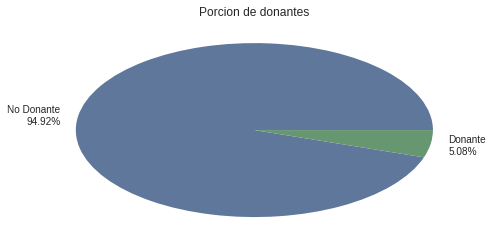

In [14]:
# Grafico de totas del porcentaje de donantes
# Agrupando por DONOR_FLAG
donantes = ONG_data.groupby('DONOR_FLAG').IDX.count() 
# Creando las leyendas del grafico.
labels = [ 'Donante\n' + str(round(x * 1.0 / donantes.sum() * 
                            100.0, 2)) + '%'  for x in donantes ]
labels[0] = 'No ' + labels[0]
plt.pie(donantes, labels=labels)
plt.title('Porcion de donantes')
plt.show()

In [15]:
# Creando subset con solo los donates
ONG_donantes = ONG_data[ONG_data.DONOR_AMOUNT > 0]
# cantidad de donantes
len(ONG_donantes)

2423

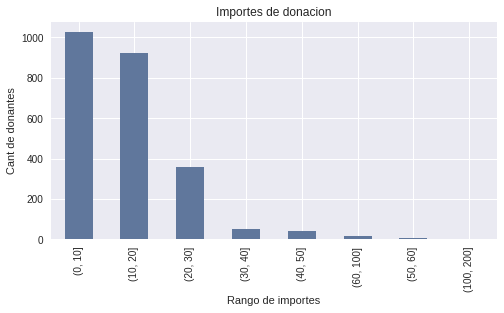

In [16]:
# Analizando el importe de donanciones
# Creando un segmentos de importes
imp_segm = pd.cut(ONG_donantes['DONOR_AMOUNT'], 
                  [0, 10,  20, 30, 40, 50, 60, 100, 200])
# Creando el grafico de barras desde pandas
plot = pd.value_counts(imp_segm).plot(kind='bar',
                                      title='Importes de donacion')
plot.set_ylabel('Cant de donantes')
plot.set_xlabel('Rango de importes')
plt.show()

In [17]:
# Agrupación por segmento segun importe donado.
pd.value_counts(imp_segm)

(0, 10]       1026
(10, 20]       921
(20, 30]       358
(30, 40]        53
(40, 50]        43
(60, 100]       15
(50, 60]         4
(100, 200]       3
Name: DONOR_AMOUNT, dtype: int64

In [18]:
# importe de donación promedio
ONG_donantes['DONOR_AMOUNT'].mean()

15.598237721832438

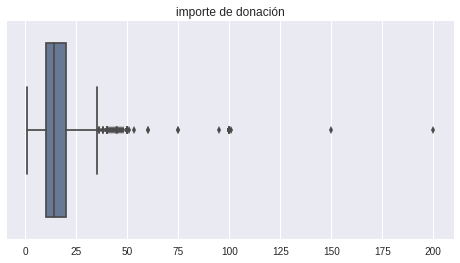

In [19]:
# Gráfico de cajas del importe de donación
sns.boxplot(list(ONG_donantes['DONOR_AMOUNT']))
plt.title('importe de donación')
plt.show()

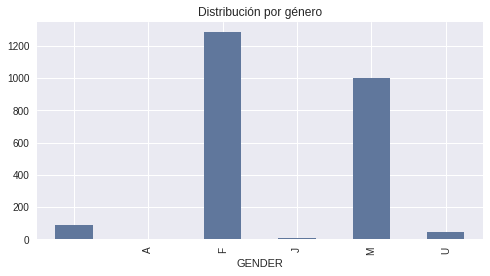

In [20]:
# Grafico del género de los donantes
ONG_donantes.groupby('GENDER').size().plot(kind='bar')
plt.title('Distribución por género')
plt.show()

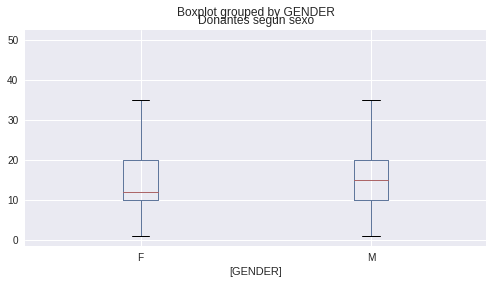

In [21]:
# Donaciones segun el género
ONG_donantes[(ONG_donantes.DONOR_AMOUNT <= 50)
             & (ONG_donantes.GENDER.isin(['F', 'M'])
               )][['DONOR_AMOUNT', 'GENDER']].boxplot(by='GENDER')
plt.title('Donantes segun sexo')
plt.show()

In [22]:
# Media de impote donado por mujeres
ONG_donantes[ONG_donantes.GENDER == 'F'][['DONOR_AMOUNT']].mean()

DONOR_AMOUNT    14.610311
dtype: float64

In [23]:
# Media de impote donado por hombres
ONG_donantes[ONG_donantes.GENDER == 'M'][['DONOR_AMOUNT']].mean()

DONOR_AMOUNT    16.81989
dtype: float64

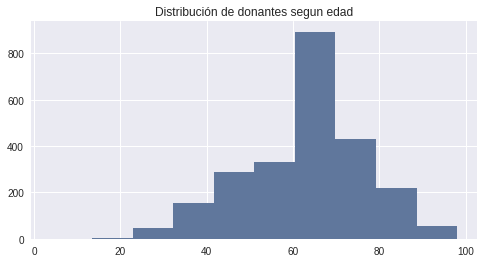

In [24]:
# Distribución de la edad de los donantes
ONG_donantes['AGE'].hist().set_title('Distribución de donantes segun edad')
plt.show()

/home/villacorta/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


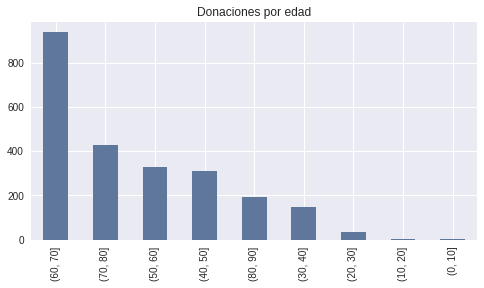

In [25]:
# Agrupando la edad por rango de a 10
AGE2 = pd.cut(ONG_donantes['AGE'], range(0, 100, 10))
ONG_donantes['AGE2'] = AGE2

# Gráfico de barras de donaciones por edad
pd.value_counts(AGE2).plot(kind='bar', title='Donaciones por edad')
plt.show()

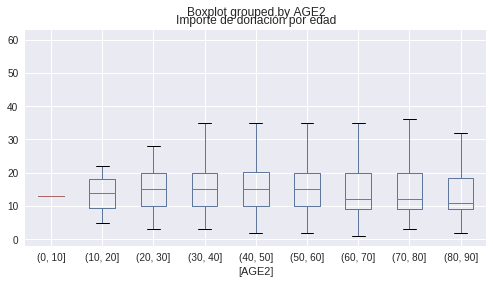

In [26]:
# Importes de donación por grango de edad
ONG_donantes[ONG_donantes.DONOR_AMOUNT <= 60][['DONOR_AMOUNT', 
                                               'AGE2']].boxplot(by='AGE2')
plt.title('Importe de donación por edad')
plt.show()